In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from diff_utils import *
import pandas as pd
from db_utils import query_hive_ssh
import re
import copy
import dateutil 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Get Blocked Users' User Talk edit count

In [28]:
query = """
SELECT
    user_text,
    COUNT(*) num_user_talk_revs
FROM
    enwiki.blocked_user_talk_diff_no_admin
GROUP
    BY user_text
"""

user_talk_revs_per_user_df = query_hive_ssh(query, 'random_sample.tsv', priority = True)
user_talk_revs_per_user_df = user_talk_revs_per_user_df.sort_values(by = 'num_user_talk_revs')
user_talk_revs_per_user_df.tail(15)

user_text  num_user_talk_revs
10615               JzG               14529
8604       Neutralhomer               15182
2043             Sitush               15660
6425         Off2riorob               16361
1425              Ceoil               18322
13032     Pigsonthewing               18568
12447     Baseball Bugs               18939
2153       TonyTheTiger               19309
3611           Alansohn               19396
15418  The Rambling Man               19782
6686          Viriditas               22548
4097   Malleus Fatuorum               24568
4284       SandyGeorgia               33079
14800            Drmies               38948
6038        Dr. Blofeld               63742

### Inspect Prolific Users

In [29]:
def inspect_user(user):

    print('User: ', user)
    print('https://en.wikipedia.org/wiki/User:%s' % user.replace(' ',  '_'))


    query = """
    SELECT
        *
    FROM
        enwiki.blocked_user_talk_diff_no_admin diffs
    WHERE
        user_text = '%(user)s'
    """

    params = {'user': user}

    df = query_hive_ssh(query % params, 'scratch.tsv', priority = True, quoting=3)
    df.columns = [c.replace('diffs.', '') for c in df.columns]
    
    
    print('\n\nCleaning Stats')
    print('Raw:', df.shape[0])
    clean_df = clean(df)
    print('Cleaned: ', clean_df.shape[0])
    reduced_df = exclude_few_tokens(clean_df, 3)
    print('No Few Words: ', reduced_df.shape[0])
    reduced_df = exclude_short_strings(reduced_df, 20)
    print('No Few Chars: ', reduced_df.shape[0])
    
    
    print('\n\n')
    print_user_history(reduced_df.sample(n=10), user)
    
    print('\n\nPost per month')
    df['timestamp'] = df['rev_timestamp'].apply(dateutil.parser.parse)
    df['month'] = df['timestamp'].apply(lambda x: x.replace(day = 1, hour=0, minute=0, second=0, microsecond=0))
    df['month'].value_counts().plot()
    
    return reduced_df

User:  Malleus Fatuorum
https://en.wikipedia.org/wiki/User:Malleus_Fatuorum


Cleaning Stats
Raw: 24568
Cleaned:  23341
No Few Words:  20533
No Few Chars:  20112



################################################################################
History for user:  Malleus Fatuorum

Block History
Log Event #:  1
Action: block
Time: 2008-05-24T17:26:35Z
Reason: personal attacks and incivility after being warned.
Parameters: 24 hours nocreate
Log Event #:  2
Action: block
Time: 2011-10-26T02:58:48Z
Reason: [[WP:No personal attacks|Personal attacks]] or [[WP:Harassment|harassment]]
Parameters: 24 hours nocreate,noautoblock
Log Event #:  3
Action: block
Time: 2012-04-06T18:01:34Z
Reason: [[WP:Disruptive editing|Disruptive editing]]: Personal attacks
Parameters: 72 hours nocreate
Log Event #:  4
Action: block
Time: 2012-09-29T23:29:38Z
Reason: [[WP:No personal attacks|Personal attacks]] or [[WP:Harassment|harassment]]: http://en.wikipedia.org/w/index.php?title=Wikipedia:Administrators%27_not

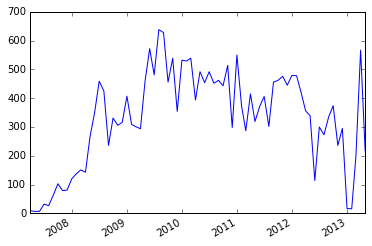

In [30]:
df = inspect_user('Malleus Fatuorum')

User:  Viriditas
https://en.wikipedia.org/wiki/User:Viriditas


Cleaning Stats
Raw: 22548
Cleaned:  20714
No Few Words:  15434
No Few Chars:  15050



################################################################################
History for user:  Viriditas

Block History
Log Event #:  1
Action: block
Time: 2015-11-18T16:12:11Z
Reason: [[WP:No personal attacks|Personal attacks]] or [[WP:Harassment|harassment]]: I hate civility blocks, but this was just too far over the line, and not a one-off
Parameters: a:2:{s:11:"5::duration";s:8:"72 hours";s:8:"6::flags";s:8:"nocreate";}
Log Event #:  2
Action: reblock
Time: 2015-11-18T22:15:20Z
Reason: [[WP:No personal attacks|Personal attacks]] or [[WP:Harassment|harassment]]: Using talk page to continue making attacks. Ignored the first few times, but it is ongoing.
Parameters: a:2:{s:11:"5::duration";s:34:"16:12, 18 November 2015 + 72 hours";s:8:"6::flags";s:19:"nocreate,nousertalk";}
##########################################################

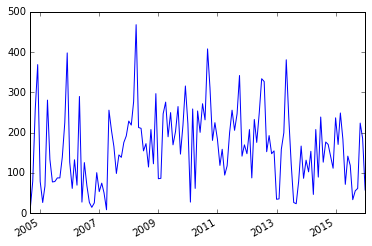

In [31]:
df = inspect_user('Viriditas')

User:  The Rambling Man
https://en.wikipedia.org/wiki/User:The_Rambling_Man


Cleaning Stats
Raw: 19782
Cleaned:  17959
No Few Words:  16787
No Few Chars:  16380



################################################################################
History for user:  The Rambling Man

Block History
Log Event #:  1
Action: block
Time: 2014-01-04T09:33:31Z
Reason: [[WP:No personal attacks|Personal attacks]] or [[WP:Harassment|harassment]]: Ongoing harassment despite multiple warnings including by arbcom member:  https://en.wikipedia.org/w/index.php?title=User_talk%3AMedeis&diff=589057615&oldid=589055009
Parameters: 24 hours nocreate
Log Event #:  2
Action: block
Time: 2016-01-11T20:33:33Z
Reason: harassment, proxying for banned editors
Parameters: a:2:{s:11:"5::duration";s:8:"48 hours";s:8:"6::flags";s:19:"nocreate,nousertalk";}
################################################################################


User:  The Rambling Man
User Talk Page:  86.130.36.25
Timestamp:  2006-11-30T18:4

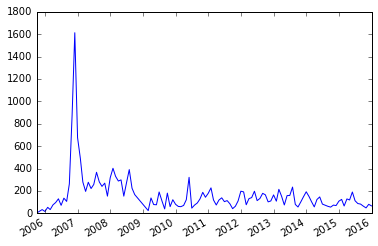

In [32]:
df = inspect_user('The Rambling Man')

User:  Pigsonthewing
https://en.wikipedia.org/wiki/User:Pigsonthewing


Cleaning Stats
Raw: 18568
Cleaned:  15896
No Few Words:  12596
No Few Chars:  12368



################################################################################
History for user:  Pigsonthewing

Block History
Log Event #:  1
Action: block
Time: 2005-12-05T22:11:51Z
Reason: harassment of editors, gaming ArbCom preliminary injunction - posting on [[WP:AN/I]]
Parameters: 1 week
Log Event #:  2
Action: block
Time: 2005-12-06T05:03:46Z
Reason: Breach of personal attack injunction.  Adjusted down from a prior seven-day block.
Parameters: 41 hours
Log Event #:  3
Action: block
Time: 2005-12-19T12:37:34Z
Reason: Personal attack in edit summaries (see http://en.wikipedia.org/wiki/Wikipedia:Administrators%27_noticeboard/Incidents#Locke_Cole)
Parameters: 12 hours
Log Event #:  4
Action: block
Time: 2008-09-10T23:20:59Z
Reason: [[WP:Disruptive editing|Disruptive editing]]: User continues to insert Personal Attack on his

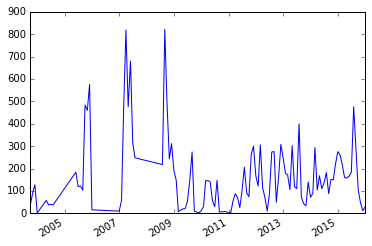

In [33]:
df = inspect_user('Pigsonthewing')

User:  Sitush
https://en.wikipedia.org/wiki/User:Sitush


Cleaning Stats
Raw: 15660
Cleaned:  14898
No Few Words:  13798
No Few Chars:  13519



################################################################################
History for user:  Sitush

Block History
Log Event #:  1
Action: block
Time: 2014-09-21T02:05:51Z
Reason: [[WP:No personal attacks|Personal attacks]] or [[WP:Harassment|harassment]]
Parameters: indefinite nocreate
Log Event #:  2
Action: block
Time: 2015-11-16T00:58:57Z
Reason: [[WP:No personal attacks|Personal attacks]] or [[WP:Harassment|harassment]]: Warned, repeated attacks
Parameters: a:2:{s:11:"5::duration";s:8:"24 hours";s:8:"6::flags";s:8:"nocreate";}
################################################################################


User:  Sitush
User Talk Page:  Mark.tidmarsh
Timestamp:  2011-02-07T16:58:04Z


Hi, for reasons I do not understand you keep putting some sort of test citation in the Orange Business article. Each time you do it it causes the a

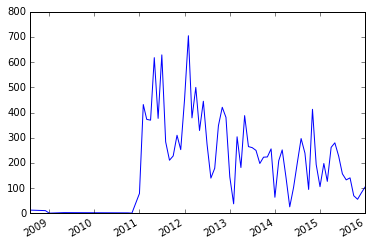

In [34]:
df = inspect_user('Sitush')